<a href="https://colab.research.google.com/github/estherMC/formacio/blob/master/IAAPRACSOL_CAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.204 · Intel·ligència Artificial Avançada / M0.539 · Intel·ligència Artificial</p>
<p style="margin: 0; text-align:right;">MU Enginyeria Informàtica / MU Enginyeria Computacional i Matemàtica</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis d'Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## CLASSIFICACIÓ D'IMATGES MITJANÇANT XARXES NEURONALS CONVOLUCIONALS


### Presentació

Els últims anys les xarxes neuronals o *Neural Networks* (NN) han demostrat la seva capacitat per a resoldre problemes que eren complexos o, fins i tot, impossibles de solucionar mitjançant tècniques tradicionals.

Un d'aquests problemes és el de la classificació d'imatges, que forma part de l'àmbit de la visió per computador. Més específicament, la classificació d'imatges pretén agrupar imatges depenent del que està representat a elles. En altres paraules, la classificació d'imatges té per objectiu assignar una classe a cada imatge analitzada. Aquest és una de les àrees a les quals les xarxes neuronals convolucionals o *Convolutional Neural Networks* (CNN) destaquen.

A aquesta pràctica explorarem l'ús de CNN per a classificar imatges analitzant distintes arquitectures, distintes formes d'entrenar-les i descobrint els avantatges i els inconvenients del denominat *transfer learning*.

### Competències

En aquest enunciat es treballaran en un determinat grau les competències
generals de màster següents:

- Capacitat per a projectar, calcular i dissenyar productes, processos i
instal·lacions en tots els àmbits de l’enginyeria en informàtica.
- Capacitat per al modelat matemàtic, càlcul i simulació en centres
tecnològics i d’enginyeria d’empresa, particularment en tasques de
recerca, desenvolupament i innovació en tots els àmbits relacionats
amb l’enginyeria en informàtica.
- Capacitat per a l’aplicació dels coneixements adquirits i per solucionar
problemes en entorns nous o poc coneguts dins de contextos més
amplis i multidisciplinars, sent capaços d’integrar aquest
coneixements.
- Disposar d'habilitats per a l’aprenentatge continuat, autodirigit i autònom
- Capacitat per modelar, dissenyar, definir l’arquitectura, implementar,
gestionar, operar, administrar i mantenir aplicacions, xarxes, sistemes,
serveis i continguts informàtics.
- Capacitat per assegurar, gestionar, auditar i certificar la qualitat dels
desenvolupaments, processos, sistemes, serveis, aplicacions i
productes informàtics..

Les competències específiques d’aquesta assignatura que es treballaran són:
- Entendre què és l’aprenentatge automàtic en el context de la
Intel·ligència Artificial.
- Distingir entre els diferents tipus i mètodes d’aprenentatge.
- Aplicar les tècniques estudiades a un cas concret.

### Objectius

En aquesta pràctica aprendreu:

* Què és el *overfitting* o sobreentrenament i com reduir-lo mitjançant augmentació de dades o *data augmentation*.
* Com construir, entrenar i avaluar una CNN enfocada a la classificació d'imatges.
* Com treure profit del *transfer learning*.
* Com avaluar i comparar distintes arquitectures de xarxa.

### Recursos

Aquesta pràctica requereix els recursos següents:

Arxius proporcionats:

  * Aquest arxiu .ipynb que estau llegint ara mateix.
  * L'arxiu DATA.XIP, el qual conté les imatges amb les que treballareu.

Complementaris:
  * Manual de teoria de l’assignatura.
  * Documentació de les biblitoeques emprades. En aquesta pràctica treballareu especialment amb Keras i Tensorflow, tot i que també emprareu altres biblioteques com NumPy o skimage. És recomanable, per tant, que llegiu la documentació d'aquestes biblioteques quan sigui necessari.

### Lliurament i criteris d'avaluació

La pràctica s'ha de lliurar el **14 de juny de 2022**.

El lliurament ha d'incloure una versió editada d'aquest cuadern (.ipynb). Es recomana l'ús de Google Colab (https://colab.research.google.com/). El codi de les solucions als exercicis s'ha de implementar i executar a les cel·les de codi proporcionades i les respostes justificades s'han d'afegir a les cel·les de text corresponents.

Totes les respostes han d'estar correctament raonades i justificades. **Les solucions que no vagin acompanyades de la corresponent resposta raonada no seran avaluades**.

Els exercicis es valoraran de la següent forma:
* Exercici 1: 2 punts
* Exercici 2: 1.5 punts
* Exercici 3: 3 punts
* Exercici 4: 1 punt
* Exercici 5: 1.5 punts
* Exercici 6: 1 punt

Cada exercici serà avaluat tenint en compte tant la correcció tècnica de la solució com la justificació i argumentació del procediment i els resultats.

Cada exercici està dividit en distints apartats (a, b, c, ...). Aquesta divisió té l'objectiu de guiar-vos en la ressolució de la pràctica i heu de solucionar cada apartat, proporcionant el codi i les explicacions requerides. Ara bé, aquests apartats *no* s'avaluaran individualment. Cada exercici serà avaluat de manera global, de manera que no hi ha una puntuació específica per a cada apartat.

### Descripció de la pràctica

#### Les dades

Un dels trets més distintius de les xarxes neuronals és la necessitat de grans quantitats de dades per a ser entrenades. Per aquest motiu, en aquesta pràctica treballareu amb el *Oxford III Pet Dataset*, el qual conté més de 7000 imatges etiquetades de gats i gossos. Les dades (*dataset*) originals es troben disponibles al següent enllaç:

https://www.robots.ox.ac.uk/~vgg/data/pets/

Desafortunadament, aquest dataset conté varies errades i, a més, combina imatges amb distintes ressolucions, dificultant el seu ús. Per aquest motiu hem preparat una versió adaptada del dataset que us proporcionem a l'arxiu DATA.ZIP.

Per tant, *no* heu de treballar amb el dataset original, sino que ho heu de fer amb la versió adaptada que us proporcionem. Aquesta versió està composada per 4780 imatges en color (RGB) de gats i gossos en format JPG a una ressolució de 128x128 píxels. Les imatges són les dades que volem que la nostra xarxa neuronal aprengui a classificar com a *imatge d'un gat* o *imatge d'un gos*.

Els noms dels arxius no tenen cap significat especial excepte per la seva primera lletra. Si la primera lletra és una "C" aleshores la imatge mostra un gat (*cat*). Per contra, si la primera lletra és una "D" la imatge mostra un gos (*dog*). Això és extremadament important, ja que significa que el *ground truth* es proporciona al propi nom de l'arxiu. Assegurau-vos de tenir clar aquest detall obrint algunes imatges i verificant que quan el nom de l'arxiu comença per C es tracta d'un gat mentre que si comença per D ens trobem davant d'un gos.

#### L'entorn de treball

Com ja es va indicar, aquesta pràctica s'entregarà com un arxiu ipỳnb. Podeu treballar amb aquest arxiu localment mitjançant la plataforma Jupyter (Jupyter Lab o Jupyter Notebook). En aquest cas haureu d'instal·lar Keras i Tensorflow a més de biblioteques com scikit-image entre d'altres.

Per a evitar problemes de dependències entre biblioteques, de versions o de conflictes entre distintes instal·lacions al vostre ordinador, us recomanem treballar amb la plataforma Google Colab:

https://colab.research.google.com/notebooks/welcome.ipynb

Un cop accediu al link anterior us haureu d'identificar amb les credencials de Google. Podeu emprar (i, de fet, us recomanem que ho feu) les vostres credencials de Google de la UOC.

A Colab podreu treballar amb el ipynb que us proporcionem i ja trobareu Keras, Tensorflow, sklearn i altres biblioteques ja instal·lades. En cas de requerir alguna biblioteca que no es trobi instal·lada podreu instal·lar-la des del propi Colab amb la comanda:

```
!pip install biblioteca-a-instalar
```

Abans de començar a treballar en aquesta pràctica és molt recomanable que us familiaritzeu amb Google Colab. En particular, és extremadament important que tingueu en compte que *tots* els arxius que genereu o guardeu dins l'espai de Colab es perden en finalitzar o abandonar la sessió. Per tant, haureu de decidir com fer que aquestes dades siguin persistents si així ho requeriu: els podeu descarregar al vostre disc dur local abans d'abandonar la sessió i tornar-los a pujar en començar de nou, o també podeu vincular el vostre Google Drive a Colab per a accedir-hi directament.

Teniu en compte que els accessos entre Colab i Google Drive són lents. Per tant, no és recomanable que els vostres programes accedeixin a Google Drive directament. És millor copiar les dades del del Drive a Colab al principi d'una sessió i des de Colab al Drive al final.

Podreu trobar informació detallada relativa a aquests aspecte en el següent enllaç:

https://colab.research.google.com/notebooks/io.ipynb

En qualsevol cas, la forma en que gestioneu els arxius és decisió vostra i forma part de la pràctica. Els professors no us proporcionarem codi per a gestionar aquests aspectes. També cal destacar que els professors donarem suport a l'aula per a Google Colab però no per altres entorns.

Una eina útil per a desenvolupar, entrenar i avaluar xarxes neuronals és TensorBoard. No hi ha cap pregunta o exercici relacionat amb TensorBoard a la pràctica, tot i que el podeu emprar si el considerau útil. No obstant, amb independència de que empreu o no TensorBoard, heu de resoldre i respondre als exercicis de la forma exacta en que es sol·liciti. Trobareu informació detallada sobre TensorBoard aquí:

https://www.tensorflow.org/tensorboard

#### Temps d'entrenament

Teniu en compte que entrenar una xarxa neuronal consumeix molt de temps. Si treballeu localment podeu reduir el temps d'entrenament emprant una GPU. Desafortunadament ni totes les GPU es poden emprar amb aquesta finalitat ni la instal·lació dels seus controladors és fàcil. Els professors *no* proporcionarem suport per a la instal·lació dels controladors d'una GPU, de CUDA, etcétera per un motiu fonamental: és una tasca més propera a la màgia (o al seu equivalent informàtic, el copy/paste de StackOverflow) que a l'enginyeria. És per aquest motiu que *no* us recomanem aquesta opció a no ser que ja tingueu una GPU adequadament instal·lada i funcionant amb Keras i Tensorflow al vostre ordinador.

Si empreu Colab podreu emprar les GPU de Google de manera que el temps d'entrenament es reduirà significativament respecte d'un entrenament sobre CPU. Ara bé... no espereu miracles. Tot i que el terme "GPU de Google" suggereix molta capacitat de procés, no és tanta com sembla.

Per tots aquests motius els exercicis proposat es centren en xarxes neuronals simples i en entrenaments petits (sols unes poques èpoques o *epochs*). Aquests entrenaments petits sobre xarxes neuronals senzilles no us permetran veure tot el potencial del *deep leraning* però sí us donaran algunes pistes sobre com funcionen les xarxes neuronals, així com els seus avantatges i inconvenients. Si, un cop acabada la pràctica, voleu repetir tots els entrenaments durant més èpoques (entre 100 i 200 per exemple) o voleu intentar ampliar els models senzills amb els que heu treballat, podeu fer-ho (sense que formi part de la pràctica a entregar).

Alguns exercicis requereixen funcions, variables o models creats i entrenats en exercicis anteriors. Si abandonau la sessió (tant el local com remotament amb Colab) per a continuar més endavant, haureu de tornar a executar totes les cel·les. Això no és problemàtic excepte per els entrenaments (ja que tarden temps en completar-se). Ja que se us demanarà que guardeu models entrenats a disc, el nostre consell és que comproveu (al vostre codi) si el model a entrenar ja existeix al disc i, si és així, el carregueu en lloc de tornar-lo a entrenar. Podeu fer-ho encara que l'exercici no ho demani expressament.

En relació a l'anterior, recordeu que els arxius de l'espai Colab es perden en tancar la sessió. Això inclou els models entrenats que pogueu haver guardat. Per a preservar-los haureu d'emprar les tècniques esmentades anteriorment.

Com a referència, si treballeu amb una CPU *normal* podeu esperar uns temps d'entrenament als models amb els que treballareu d'entre 1 i 2 minuts per epoch. Si disposau d'una GPU *normal* y la podeu emprar per a l'entrenament, aquests temps es reduiran a entre 5 i 15 segons per epoch. A Google Colab amb GPU els temps d'entrenament seran propers als 10 o 15 segons per epoch, tot i que aquest temps depèn molt de la disponibilitat i la càrrega de treball dels servidors de Google.

#### Grandària dels models

Els models que guardareu a disc en aquesta pràctique tenen unes grandàries que oscil·len entre unes desenes de MB (els models senzills) i més de 100 MB (el model basat en Xception). Teniu en compte aquestes xifres per a no saturar el vostre disc dur o el vostre compte de Google.

#### Sobre Keras

Keras ha patit alguns canvis darrerament que afecten a la forma d'importar els seus components. Si, en algun moment, intenteu importar un component de Keras amb **import keras.xxx** i us apareix un missatge d'error haureu de canviar la importació per **import tensorflow.keras.xxx** i viceversa.

### Exercicis

#### **Exercici 1: Entenent el conjunt de dades**

**1-a) Creau dues llistes denominades catFiles i dogFiles. La primera ha de contenir els noms d'arxiu (només els noms, sense la ruta) de les imatges que contenguin gats. La segona ha de contenir els noms d'arxiu de les imatges que contenguin gossos. Per a diferenciar entre gats i gossos emprau la primera lletra del nom de l'arxiu (C per a gats i D per a gossos). Després, imprimiu el text 'CATS: x, DOGS: y' a on x i y són el nombre d'imatges de gats i gossos respectivament.**

**Consell: No és necessari llegir les imatges en aquest exercici. Només heu d'accedir als noms dels arxius. Per a fer-ho podeu emprar la biblioteca "os" (import os)**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import os

# Convenienve variable to store the path
imgPath='DATA'

# Get the files lists
catFiles=[f for f in os.listdir(imgPath) if f[0].upper()=='C' and os.path.isfile(os.path.join(imgPath,f))]
dogFiles=[f for f in os.listdir(imgPath) if f[0].upper()=='D' and os.path.isfile(os.path.join(imgPath,f))]

# Print the count
print('CATS: %d, DOGS: %d'%(len(catFiles),len(dogFiles)))

CATS: 2390, DOGS: 2390


**1-b) Creau la funció plot\_pets(imgPath,fileNames,numImages) encarregada de dibuixar les primeres *numImages* imatges de *fileNames* una al costat de l'altra (és a dir, heu de dibuixar una fila de *numImages* imatges). El paràmetre d'entrada *imgPath* representa la ruta a les imatges (per exemple, 'DATA'). Sobre cada imatge mostrau el text "NROWSxNCOLSxNCHANS,TYPE" a on NROWS és el nombre de files (alçada) de la imatge, NCOLS és el nombre de columnes (amplada), NCHANS és el nombre de canals de color i TYPE és el tipus de les dades de la matriu imatge.**

**Després emprau plot\_pets per a dibuixar els cinc primers gats dins catFiles i els cinc primers gossos de dogFiles.**

**Consell: Un cop carregada, una imatge és simplement un array NumPy al qual la primera i la segona dimensió representen files i columnes i la tercera dimensió es refereix als canals de color. Pel que fa al tipus, trobareu informació sobre com obtenir-lo a la documentació de NumPy. Us recomanem la biblioteca skimage per a llegir les imatges i matplotlib.pyplot per a mostrar-les per pantalla, tot i que hi han altres opcions possibles.**

/usr/local/lib/python3.8/dist-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


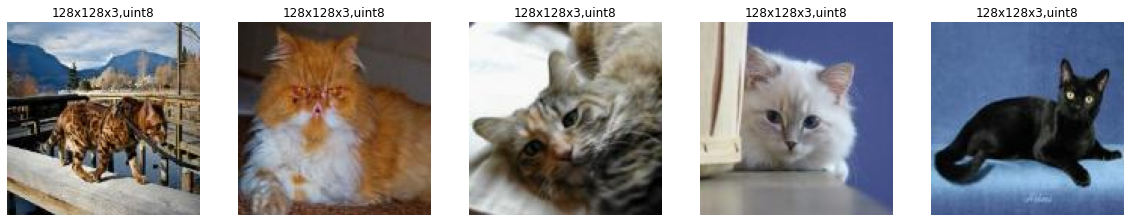

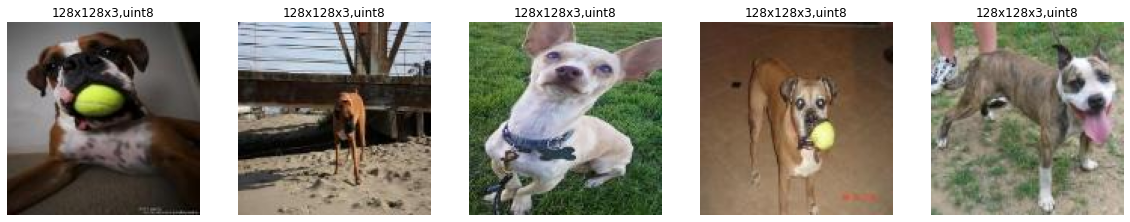

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import matplotlib.pyplot as plt
import os
from skimage.io import imread

# The requested function
def plot_pets(imgPath,fileNames,numImages):
    theFigure,theAxes=plt.subplots(1,numImages,figsize=(20,8))
    for i in range(numImages):
        theImage=imread(os.path.join(imgPath,fileNames[i]))
        theAxes[i].imshow(theImage)
        theAxes[i].axis('off')
        theAxes[i].set_title('%dx%dx%d,%s'%(theImage.shape[0],theImage.shape[1],theImage.shape[2],theImage.dtype))

# Get the file lists again (not necessary if the previous cell was already executed)
imgPath='DATA'
catFiles=[f for f in os.listdir(imgPath) if f[0].upper()=='C' and os.path.isfile(os.path.join(imgPath,f))]
dogFiles=[f for f in os.listdir(imgPath) if f[0].upper()=='D' and os.path.isfile(os.path.join(imgPath,f))]

# Plot the images
plot_pets(imgPath,catFiles,5)
plot_pets(imgPath,dogFiles,5)

**1-c) De vegades l'entrenament d'una xarxa neuronal produeix l'anomenat *overfitting* (sobreentrenament). Quan això passa, la xarxa neuronal comença a memoritzar les dades d'entrenament en lloc d'aprendre'n. Evitar el sobreentrenament és complicat, però un bon punt de partida és disposar de més dades d'entrenament. Ja que això no sempre és possible, una tècnica habitual consisteix a realitzar l'anomenada "augmentació de dades" o *data augmentation*.**

**L'augmentació de dades consisteix a crear variacions de les dades existents de forma realista. Per exemple, es podria fer un flip horitzontal de cada imatge (generant així una imatge mirall) i el resultat continuaria sent realista. Per contra, fer un *flip* vertical no donaria com a resultat una imatge realista ja que els gossos i els gats no estan (habitualment) amb el cap avall i les potes a dalt. En aquest exercici programareu una funció capaç de crear tres variacions diferents (i combinables) d'una imatge d'entrada.**

**Creau la funció create\_variation(theImage,doFlip,doNoise,doRotate) que faci el següent:**

* **Converteix la imatge a una representació en punt flotant on cada canal a cada píxel es representa com un valor en punt flotant entre 0 i 1. Això és important atès que les xarxes neuronals es comporten millor amb aquests valors. Utilitzeu la funció img\_as\_float de skimage per fer-ho.**
* **Si doFlip==True, la funció volteja horitzontalment la imatge. Busqueu a la documentació de NumPy informació sobre la funció fliplr.**
* **Si doNoise==True, la funció corromp lleugerament la image per simular problemes amb la càmera o el CCD. Utilitzeu la funció random\_noise de skimage amb els paràmetres per defecte.**
* **Si doRotate==True, la funció rota la image respecte al seu centre un angle aleatori entre -45 i +45 graus. Utilitzeu la funció rotate de skimage amb el mode 'symmetric' per emplenar els buits que sorgeixen després de la rotació.**

**Noteu que la funció ha de retornar en tots els casos una imatge de la mateixa mida i nombre de canals que la imatge d'entrada, encara que convertida al format en punt flotant esmentat anteriorment. Noteu també que el resultat de la funció pot consistir a no aplicar cap transformació a la imatge, a aplicar-ne una o a aplicar-ne diverses, depenent de les combinacions de valors de doFlip, doNoise i doRotate.**

**Després d'això, utilitzeu la funció per dibuixar 40 imatges distribuïdes en 8 files i 5 columnes. Cada columna es correspon amb una imatge del dataset (podeu triar-les com vulgueu) i cada fila es correspon a una de les 8 possibles combinacions de doFlip, doNoise i doRotate (des de doFlip=doNoise=doRotate=False fins a doFlip=doNoise=doRotate=True ).**

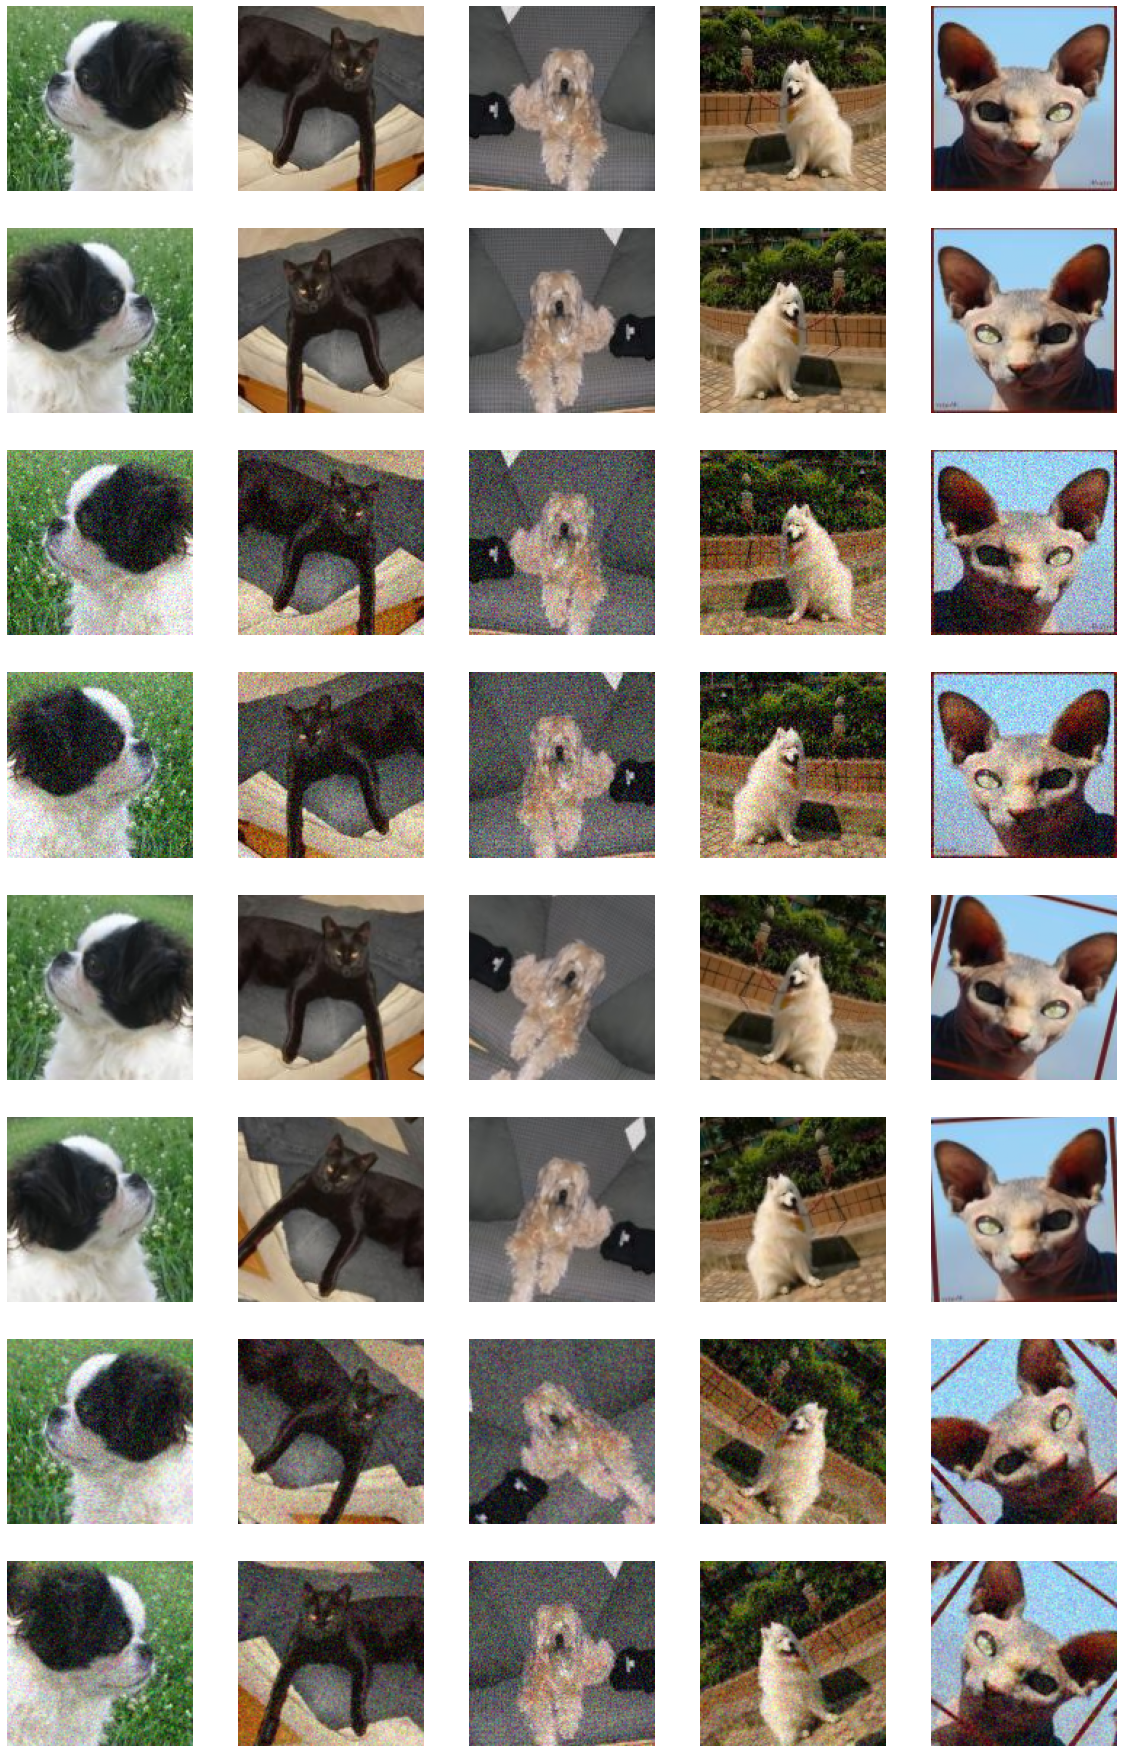

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import numpy as np
from random import shuffle,random
from skimage.util import img_as_float,random_noise
from skimage.io import imread
from skimage.transform import rotate
import matplotlib.pyplot as plt

# The requested function
def create_variation(theImage,doFlip,doNoise,doRotate):
    theImage=img_as_float(theImage)
    if doFlip:
        theImage=np.fliplr(theImage)
    if doNoise:
        theImage=random_noise(theImage)
    if doRotate:
        theImage=rotate(theImage,random()*90-45,mode='symmetric')
    return theImage

# Plot as requested
numImages=5
numVariations=8

# Get all files and shuffle (not necessary in this activity) them.
allFiles=[f for f in os.listdir(imgPath) if os.path.isfile(os.path.join(imgPath,f))]
shuffle(allFiles)

# Create the figure
theFigure,theAxes=plt.subplots(numVariations,numImages,figsize=(20,32))

# Loop for each image
for i in range(numImages):
    srcImage=imread(os.path.join(imgPath,allFiles[i]))
    # Create and plot the 8 variations (take advantage of binary encoding)
    for j in range(numVariations):
        newImage=create_variation(srcImage,(j&1)!=0,(j&2)!=0,(j&4)!=0)
        theAxes[j,i].imshow(newImage)
        theAxes[j,i].axis('off')

**1-d) Per entrenar una xarxa neuronal és habitual disposar de tres conjunts de dades: el conjunt d'entrenament (que es fa servir per entrenar la xarxa), el conjunt de validació (que s'utilitza per avaluar l'entrenament i modificar la xarxa neuronal si cal) i el conjunt de test (que es fa servir per a l'avaluació final de la xarxa). Aquests conjunts han de ser disjunts i no han de donar preferència a cap mena o distribució de dades.**

**En aquest exercici haureu de crear la funció split\_datafiles la qual ha de generar aquests tres conjunts de dades a partir del dataset proporcionat. En concret, la funció ha de retornar les tres següents llistes de fitxers (sense la ruta, només el nom dels fitxers):**

* **trainSet: Ha de contenir el 70% dels noms de fitxer existents al dataset.**
* **testSet: Ha de contenir el 20% dels noms de fitxer existents al dataset.**
* **valSet: Ha de contenir el 10% dels noms de fitxer existents al dataset.**

**Aquestes tres llistes han de ser disjuntes (sense noms repetits ni dins d'una llista ni entre elles), han de tenir un ordre aleatori (sense cap ordre específic) i les tres llistes combinades han de contenir tots els noms de fitxer del conjunt de dades de partida.**

**Després de programar la funció, executada-la i emmagatzemeu la sortida entre variables: trainSet, testSet i valSet. Recordeu que aquestes variables són llistes que contenen noms de fitxer. No contenen les imatges, només els noms del fitxer.**

**Tot i que és molt probable que la selecció aleatòria generi conjunts d'entrenament, validació i test balancejats, no hi ha garanties que sigui així. Per tant, un cop generats trainSet, testSet i valSet us heu d'assagurar (per programa) que el nombre de gats i gossos dins cada un d'ells no difereixi en més d'un 10%. Per exemple, un conjunt amb 100 gats i 105 gossos seria correcte però un conjunt amb 100 gats i 111 gossos es consideraria no balancejat. Assegureu-vos que els tres conjunts estan balancejats i, si no ho estan, generau-los de nou fins que ho estiguin.**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import os
from random import shuffle

imgPath='DATA'

def count_cats_and_dogs(fileList):
    numCats=sum(f[0].upper()=='C' for f in fileList)
    numDogs=sum(f[0].upper()=='D' for f in fileList)
    return numCats,numDogs

def split_datafiles():
    trainRatio=0.7
    testRatio=0.2
    fileNames=[f for f in os.listdir(imgPath) if os.path.isfile(os.path.join(imgPath,f))]
    shuffle(fileNames)
    numItems=len(fileNames)
    cut0=int(numItems*trainRatio)
    cut1=int(numItems*(trainRatio+testRatio))
    trainSet=fileNames[:cut0]
    testSet=fileNames[cut0:cut1]
    valSet=fileNames[cut1:]
    return [trainSet,testSet,valSet]

trainOk=testOk=valOk=False

while not trainOk or not testOk or not valOk:
    [trainSet,testSet,valSet]=split_datafiles()
    nCatsTrain,nDogsTrain=count_cats_and_dogs(trainSet)
    nCatsTest,nDogsTest=count_cats_and_dogs(testSet)
    nCatsVal,nDogsVal=count_cats_and_dogs(valSet)
    trainOk=(max(nCatsTrain,nDogsTrain)/min(nCatsTrain,nDogsTrain)<=1.1)
    testOk=(max(nCatsTest,nDogsTest)/min(nCatsTest,nDogsTest)<=1.1)
    valOk=(max(nCatsVal,nDogsVal)/min(nCatsVal,nDogsVal)<=1.1)

print('TRAINSET HAS %d CATS AND %d DOGS'%(count_cats_and_dogs(trainSet)))
print('TESTSET HAS %d CATS AND %d DOGS'%(count_cats_and_dogs(testSet)))
print('VALSET HAS %d CATS AND %d DOGS'%(count_cats_and_dogs(valSet)))

TRAINSET HAS 1671 CATS AND 1675 DOGS
TESTSET HAS 474 CATS AND 482 DOGS
VALSET HAS 245 CATS AND 233 DOGS


#### **Exercici 2: Generació de dades**

Keras proporciona diferents mètodes per alimentar una xarxa neuronal durant l'entrenament, la validació i el test. Aquests mètodes reben el nom genèric de generadors de dades o *data generators*. Per exemple, Keras proporciona generadors de dades específics per a imatges molt completes i totalment funcionals. En aquest exercici, però, construireu una classe *DataGenerator* molt simple en lloc d'utilitzar les ja existents, de manera que aprendreu com funcionen els generadors de dades, què és la generació de dades i com fer augmentació de dades dins del propi generador .

En aquest context, la classe DataGenerator ha d'heretar de la classe Sequence i ha de proporcionar almenys dos mètodes:

* \_\_len\_\_(): Aquest mètode retorna el nombre de lots (o *batches*) diferents que pot proporcionar el DataGenerator.
* \_\_getitem\_\_(i): Aquest mètode proporciona les imatges del lot i-èsim i les seves corresponents classes (el seu *ground truth*).

Encara que no cal, és molt recomanable que un generador de dades també proporcioni el mètode on\_epoch\_end, el qual s'executa després de cada epoch durant l'entrenament.

**2-a) En aquest exercici heu de completar la classe DataGenerator que se us proporciona parcialment implementada a la cel·la següent. Com podreu observar, només heu de completar el mètode \_load\_image\_, el qual s'usa internament per \_\_getitem\_\_. Haureu de decidir el que fa \_load\_image\_ a partir dels comentaris proporcionats al codi i dels mètodes ja programats.**

**Després de completar la classe, executeu les quatre línies següents per crear quatre objectes DataGenerator: dos DataGenerator d'entrenament, un de test i un de validació. El primer paràmetre d'entrada (trainSet, testSet i valSet respectivament) és la sortida de la funció split\_datafiles que heu creat anteriorment.**

````
trainGenerator1=DataGenerator(trainSet,False)
trainGenerator2=DataGenerator(trainSet,True)
testGenerator=DataGenerator(testSet,False)
valGenerator=DataGenerator(valSet,False)
````

**Noteu el següent:**

* **L'augmentació de dades sol·licitada és gairebé idèntica al que ja heu fet a la funció create\_variation. Podeu cridar a aquesta funció o bé programar-ho tot directament dins de \_load\_image\_.**
* **L'execució de les quatre línies esmentades us pot ajudar a detectar errors al codi del DataGenerator.**
* **Aquestes quatre línies ja estan incloses al final de la cel·la següent. Per tant, no les heu de tornar a incloure.**
* **Es creen dos objectes DataGenerator per a entrenament (trainGenerator1 i trainGenerator2). Un inclou augmentació de dades (trainGenerator2) i l'altre no (trainGenerator1). En els exercicis següents s'explorarà l'ús de tots dos.**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

from tensorflow.keras.utils import Sequence
from skimage.io import imread
from skimage.util import img_as_float,random_noise
from skimage.transform import rotate
import numpy as np
import random
import os

class DataGenerator(Sequence):
    # Constructor. Input parameters are:
    # * fileNames   : List of sample file names, as provided by split_datafiles. This allows to build
    #                 a train data generator, a test data generator or a validation data generator just
    #                 by using the corresponding split_datafiles output.
    # * doRandomize : If True, the provided file names are shuffled after each training epoch. Also, each
    #                 individual image, when loaded, can be left unchanged, flipped, corrupted with
    #                 noise or rotated (as in previous activity). Each of the 8 possible combinations
    #                 (which included leaving the image unchanged) is chosen randomly with equal probability.
    #                 If False, file names are not shuffled and each image is provided unchanged.
    # * imgPath     : Path to the images (i.e. DATA)
    # * batchSize   : Number of sample images and ground truth items in each batch
    def __init__(self,fileNames,doRandomize=False,imgPath='DATA',batchSize=10):
        # Store parameters
        self.imgPath=imgPath
        self.fileNames=fileNames.copy()
        self.batchSize=batchSize
        self.doRandomize=doRandomize
        # Get number of files (to avoid computing them later)
        self.numImages=len(self.fileNames)
        # Shuffle them if required
        self.on_epoch_end()

    # Shuffle data at the end of every epoch if required
    def on_epoch_end(self):
        if self.doRandomize:
            random.shuffle(self.fileNames)

    # Returns the number ot batches
    def __len__(self):
        return int(np.ceil(float(self.numImages)/float(self.batchSize)))

    # Given an index, loads the image, performs data augmentation if doRandomize
    # is True by possibly modifying the image (see comments in the class header)
    # and outputs the (possibly transformed) image and its class. In all cases,
    # the returned image must be of "float" type (use img\_as\_float).
    # Input  : theIndex - Index of the image to load within self.fileNames.
    # Output : theImage - Loaded (and possibly transformed) image. Must be
    #                     of float type with values within [0,1]
    #          theClass - 0: Cat, 1: Dog
    def _load_image_(self,theIndex):

# ---> PUT YOUR CODE BETWEEN THIS LINE...

        # Get the file name
        fileName=self.fileNames[theIndex]
        # Get the ground truth
        if fileName[0]=='C':
            theClass=0
        else:
            theClass=1
        # Load the image
        theImage=img_as_float(imread(os.path.join(self.imgPath,fileName)))
        # Do data augmentation
        if self.doRandomize:
            randNum=random.randint(0,7)
            if (randNum&1)!=0:
                theImage=np.fliplr(theImage)
            if (randNum&2)!=0:
                theImage=random_noise(theImage)
            if (randNum&4)!=0:
                theImage=rotate(theImage,random.random()*90-45,mode='symmetric')

        # That's it

# ... AND THIS LINE <---

        return theImage,theClass

    # Provides the "theIndex-th" batch
    # Batch format:
    # - X : The data. Numpy array of shape (bs,nr,nc,3)
    # - y : The ground truth. Numpy array of shape (bs,1)
    # Where nb=batch size, nr=num rows, nc=num cols
    # Note that in our dataset all images have the same size and number of
    # channels. Otherwise, the __getitem__ method should also take care of
    # different resolutions and color encodings.
    def __getitem__(self,theIndex):
        X=[]
        y=[]
        bStart=max(theIndex*self.batchSize,0)
        bEnd=min((theIndex+1)*self.batchSize,self.numImages)
        for i in range(bStart,bEnd):
            [curImage,curGT]=self._load_image_(i)
            X.append(curImage)
            y.append(curGT)
        return np.array(X),np.array(y)

trainGenerator1=DataGenerator(trainSet,False)
trainGenerator2=DataGenerator(trainSet,True)
testGenerator=DataGenerator(testSet,False)
valGenerator=DataGenerator(valSet,False)

**2-b) Creeu la funció plot\_batch(X,y) encarregada de mostrar les imatges d'un lot (*batch*) una al costat de l'altra (una fila d'imatges). El paràmetre d'entrada "X" és un lot d'imatges i "y" és un lot de classes (*ground truth*) tal com proporciona el mètode \_\_getitem\_\_ del DataGenerator. Sobre cada imatge la funció ha de mostrar el text CAT o DOG depenent de la classe corresponent segons el ground truth.**

**Després executeu les línies següents (ja proporcionades) per dibuixar el primer lot dels dos DataGenerator d'entrenament:**

````
[X,y]=trainGenerator1.__getitem__(0)
plot_batch(X,y)
[X,y]=trainGenerator2.__getitem__(0)
plot_batch(X,y)
````

**Com que trainGenerator2 realitza augmentació de dades, si executeu la cel·la diverses vegades hauríeu de veure diferents resultats cada vegada a la segona fila d'imatges.**

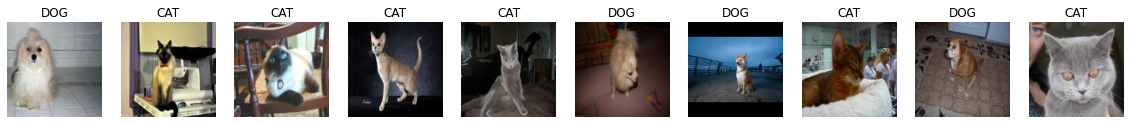

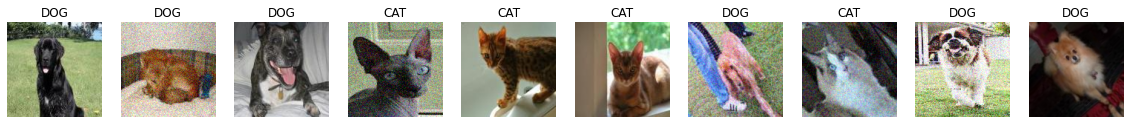

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

# ---> PUT YOUR CODE BETWEEN THIS LINE...

import matplotlib.pyplot as plt

# The requested function
def plot_batch(X,y):
    numImages=X.shape[0]
    theFigure,theAxes=plt.subplots(1,numImages,figsize=(numImages*2,2))
    for i in range(numImages):
        theAxes[i].imshow(X[i])
        theTitle=['CAT','DOG'][y[i]]
        theAxes[i].set_title(theTitle)
        theAxes[i].axis('off')

# ... AND THIS LINE <---

# Plot as requested
[X,y]=trainGenerator1.__getitem__(0)
plot_batch(X,y)
[X,y]=trainGenerator2.__getitem__(0)
plot_batch(X,y)

#### **Exercici 3: Creació d'un classificador senzill**

L'arquitectura de xarxa neuronal més habitual per classificar imatges està formada per:

* Un **feature extractor** (extractor de característiques) encarregat de transformar la imatge d'entrada a una representació més petita a través de capes consecutives (típicament capes convolucionals i de *pooling*).
* Un **classificador** a càrrec de transformar la sortida de l'extractor de característiques en una classe. Els classificadors es componen, normalment, d'una capa de *flattening* (aplanament) que converteix la sortida del classificador en un tensor 1D; i d'un conjunt de capes denses (*fully connected layers*). L'última capa (la capa de sortida) representarà la classe.

Busqueu informació sobre xarxes neuronals convolucionals (CNN) per a classificació d'imatges. Busqueu també informació a la documentació de Keras sobre els models seqüencials (*Sequential models*) i les capes Conv2D, MaxPooling2D, Flatten i Dense entre d'altres.

Un cop assimilats aquests conceptes podreu completar aquest exercici.

**3-a) Completeu el codi a la cel·la següent de manera que el model resultant compleixi els requisits següents:**

* **La dimensió de les dades d'entrada (input\_shape) ha de ser (128,128,3). És a dir, la mida de les dades d'entrada ha de ser la de les imatges al dataset.**
* **La dimensió de sortida ha de ser 1. Només necessitem una neurona per codificar la classe (0 per a gats i 1 per a gossos) atès que *no* utilitzarem codificació categòrica. Noteu que la dimensió de sortida no s'especifica directament enlloc. Podeu consultar la dimensió de sortida utilitzant, per exemple, el mètode summary() del model.**
* **L'extractor de característiques ha d'estar compost per 4 capes (dos parells de Conv2D i MaxPooling2D).**
* **Just després de l'extractor de característiques hi ha d'haver una capa Flatten().**
* **El classificador ha d'estar compost per dues capes denses. D'aquestes dues capes, la capa oculta ha de constar de 128 neurones.**
* **La funció d'activació de la capa de sortida del classificador (l'última capa de la xarxa neuronal) ha de ser "sigmoid".**
* **El nombre total de paràmetres entrenables del model ha d'estar entre els 3 i els 4 milions.**
* **Per facilitar-vos la feina ja es proporcionen algunes capes. Per tant, alguns dels requisits esmentats ja es compleixen.**

**A més, el vostre codi ha de compilar el model amb l'optimitzador RMSprop amb una taxa d'aprenentatge (learning rate) de 0.0001 utilitzant "binary_crossentropy" com a funció de pèrdua (loss function) i, almenys, *accuracy* com a mètrica.**

**Un cop definit i compilat el model, mostreu un resum del mateix mitjançant el mètode summary(). Entre altres, el mètode summary() mostrarà el nombre de paràmetres entrenables que, com s'ha indicat, ha d'estar entre els 3 i els 4 milions.**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten
from tensorflow.keras import optimizers

# Model creation and compilation is conveniently placed in a function so it is easy to
# re-create the model later.
def create_and_compile_scratch_model():
    theModel=models.Sequential([
        Conv2D(32,(3,3),activation='relu',input_shape=(128,128,3)),
        MaxPooling2D((2,2),padding='same'),

# ---> PUT YOUR CODE TO COMPLETE THE MODEL BETWEEN THIS LINE...

        Conv2D(32,(3,3),activation='relu'),
        MaxPooling2D((2,2),padding='same'),
        Flatten(),
        Dense(128,activation='relu'),

# ... AND THIS LINE <---

        Dense(1,activation='sigmoid')
    ])

# ---> PUT YOUR CODE TO COMPILE THE MODEL BETWEEN THIS LINE...

    theModel.compile(optimizer=optimizers.RMSprop(lr=1e-4), loss='binary_crossentropy', metrics = ['accuracy'])

# ... AND THIS LINE <---

    return theModel

theModel=create_and_compile_scratch_model()
theModel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3936384   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

**3-b) Entreneu el model anterior durant 30 epochs utilitzant trainGenerator1 per subministrar les dades d'entrenament i valGenerator per subministrar les dades de validació.**

**El mètode d'entrenament és fit() i torna, entre d'altres, informació relativa a l'històric de l'entrenament al camp *.history*. Guardeu aquest històric a la variable trainHistory.**

**Durant l'entrenament veureu les mètriques de qualitat que hàgiu especificat al camp "metrics" en compilar el model. El vostre objectiu és aconseguir una precisió de validació (val\_accuracy) d'almenys un 65%. Això significa que el valor de val\_accuracy a l'últim epoch ha de ser de, almenys, 0.65.**

**Si no aconseguiu aquest valor de val\_accuracy haureu de modificar el model a l'apartat anterior i repetir l'entrenament fins que ho aconseguiu.**

**Si, per algun motiu, pareu l'entrenament abans que finalitzi haureu de crear i compilar el model de nou abans de tornar a entrenar. Si no ho feu, l'entrenament no serà correcte.**

**En aquest exercici esteu ajuntant la major part del treball d'exercicis anteriors. Per tant, és possible que us apareguin errors que us obliguin a revisar apartats anteriors.**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import os
# Note: This check is performed to avoid spending time training if the model has already been saved.
if not os.path.isfile('FIRSTMODEL.h5'):
    trainHistory=theModel.fit(trainGenerator1,validation_data=valGenerator,epochs=30).history
else:
    print('[WARNING] MODEL ALREADY TRAINED AND SAVED. SKIPPING TRAINING.')
    print('TO LOAD IT, PLEASE USE load_trained_model DEFINED IN FURTHER CELLS.')

Epoch 1/30
335/335 [==============================] - 4s 12ms/step - loss: 0.6884 - accuracy: 0.5481 - val_loss: 0.6550 - val_accuracy: 0.6172
Epoch 2/30
335/335 [==============================] - 4s 11ms/step - loss: 0.6161 - accuracy: 0.6692 - val_loss: 0.6177 - val_accuracy: 0.6527
Epoch 3/30
335/335 [==============================] - 4s 12ms/step - loss: 0.5611 - accuracy: 0.7233 - val_loss: 0.6041 - val_accuracy: 0.6653
Epoch 4/30
335/335 [==============================] - 4s 11ms/step - loss: 0.5212 - accuracy: 0.7388 - val_loss: 0.5888 - val_accuracy: 0.6757
Epoch 5/30
335/335 [==============================] - 4s 11ms/step - loss: 0.4770 - accuracy: 0.7776 - val_loss: 0.5860 - val_accuracy: 0.6841
Epoch 6/30
335/335 [==============================] - 4s 11ms/step - loss: 0.4403 - accuracy: 0.8007 - val_loss: 0.6123 - val_accuracy: 0.6778
Epoch 7/30
335/335 [==============================] - 4s 11ms/step - loss: 0.4015 - accuracy: 0.8204 - val_loss: 0.5677 - val_accuracy: 0.7218

**3-c) Creeu les funcions save\_trained\_model(fileName,theModel,trainHistory) i [theModel,trainHistory]=load\_trained\_model(fileName) encarregades de desar en disc i carregar des de disc, respectivament, el model entrenat i la història del seu entrenament (trainHistory). Per evitar sobreescriptures accidentals, implementeu la funció save\_trained\_model de manera que si algun dels arxius a escriure ja existeix no faci res.**

**Pel que fa a guardar i carregar el model entrenat, llegiu la documentació de Keras. Pel que fa a guardar i carregar el trainHistory, la nostra recomanació és utilitzar les funcions dump i load del mòdul pickle, encara que hi ha altres opcions igualment acceptables.**

**Després de crear les funcions desau i carregau el model (utilitzant "FIRSTMODEL" com a fileName) per comprovar que tot funciona com s'espera**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

from pickle import dump,load
from tensorflow.keras.models import load_model
import os

def save_trained_model(fileName,theModel,trainHistory):
    # Define file names
    fNameModel=fileName+'.h5'
    fNameHistory=fileName+'.pkl'

    if os.path.isfile(fNameModel) or os.path.isfile(fNameHistory):
        print('[WARNING] A MODEL ALREADY EXISTS WITH THIS FILE NAME. ABORTING.')
        return

    # Save the trained model
    theModel.save(fNameModel)

    # Save the train history
    with open(fNameHistory,'wb') as outFile:
        dump(trainHistory,outFile)

def load_trained_model(fileName):
    # Define file names
    fNameModel=fileName+'.h5'
    fNameHistory=fileName+'.pkl'

    # Load the model
    theModel=load_model(fNameModel)

    # Load the train history
    with open(fNameHistory,'rb') as inFile:
        trainHistory=load(inFile)

    return theModel,trainHistory

save_trained_model('FIRSTMODEL',theModel,trainHistory)
theModel,trainHistory=load_trained_model('FIRSTMODEL')

**3-d) Creeu la funció plot\_history(theHistory), on theHistory és l'històric de l'entrenament del model (el trainHistory de cel·les anteriors). La funció ha de crear dues figures. A la primera cal mostrar l'evolució de la precisió (accuracy) de l'entrenament i de la validació respecte als epochs. A la segona cal mostrar l'evolució de la funció de pèrdua (loss) d'entrenament i validació respecte als epochs. Per tant, haureu de cercar informació sobre l'estructura del trainHistory.**

**Després de crear la funció, utilitzeu-la per mostrar les gràfiques corresponents el trainHistory dels apartats anteriors.**

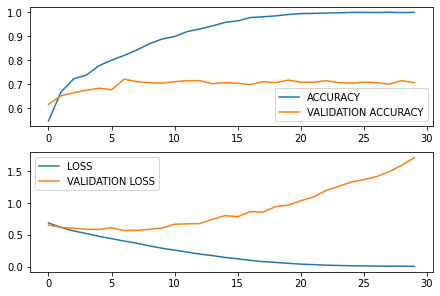

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import matplotlib.pyplot as plt

def plot_history(theHistory):
    theAccuracy=theHistory['accuracy']
    valAccuracy=theHistory['val_accuracy']

    theFigure,theAxes=plt.subplots(2,1,constrained_layout=True)
    theAxes[0].plot(theAccuracy)
    theAxes[0].plot(valAccuracy)
    theAxes[0].legend(['ACCURACY','VALIDATION ACCURACY'])

    theLoss=theHistory['loss']
    valLoss=theHistory['val_loss']
    theAxes[1].plot(theLoss)
    theAxes[1].plot(valLoss)
    theAxes[1].legend(['LOSS','VALIDATION LOSS'])

theModel,trainHistory=load_trained_model('FIRSTMODEL')
plot_history(trainHistory)

**3-e) Avalueu el model (amb el mètode *evaluate()*) utilitzant testGenerator. Mostrau la precisió (*accuracy*) resultant.**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

theEvaluation=theModel.evaluate(testGenerator)
print(theModel.metrics_names[1],"=",theEvaluation[1])

96/96 [==============================] - 1s 8ms/step - loss: 1.8846 - accuracy: 0.7008
accuracy = 0.7008368372917175


**3-f) Agafeu un lot del testGenerator, prediu les classes mitjançant el model entrenat (utilitzant el mètode *predict()*) i dibuixeu les imatges del lot juntament amb la classe predita pel model. Per això podeu utilitzar la funció plot\_batch programada anteriorment.**

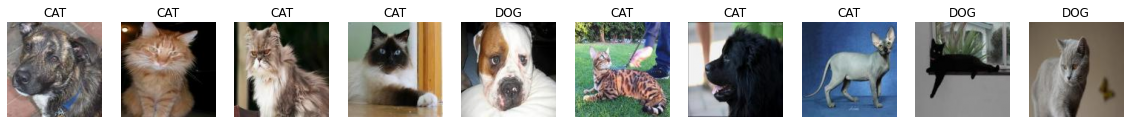

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

testImages,testGT=testGenerator.__getitem__(0)
thePredictions=theModel.predict(testImages)
plot_batch(testImages,np.round(thePredictions).flatten().astype('int'))

**3-g) Analitzeu els resultats de 3-d, 3-e i 3-f. Què passa amb les precisions i les pèrdues d'entrenament comparades amb les precisions i les pèrdues de validació? S'ha produït overfitting? Per què?**

**Escriviu la vostra resposta a continuació en aquesta mateixa cel·la.**

S'espera que l'estudiant reflexioni sobre les diferències entre les gràfiques (mentre la precisió d'entrenament creix i la pèrdua d'entrenament decreix, les contrapartides de validació o bé tenen el comportament contrari o romanens molt estables) i que conclogui que són símptomes d'overfitting.

També s'espera una reflexió sobre la similitud entre la precisió de validació i la de test i el fet que encara que aquestes precisions siguin baixes, la precisió d'entrenament sigui extremadament alta.

#### **Exercici 4: Millorant el classificador**

En aquest exercici utilitzarem la mateixa arquitectura que a l'exercici anterior però entrenant-la amb trainGenerator2. Per tant, farem servir augmentació de dades. Noteu que:

* Atès que en aquest exercici bàsicament repetireu les tasques de l'exercici 3 (però utilitzant un generador de dades d'entrenament diferent) podeu cridar a qualsevol funció que hàgiu creat a l'exercici anterior.
* El temps d'entrenament hauria de ser similar al de l'exercici 3 (atès que el model és el mateix). Si observeu que és molt més gran hauríeu d'optimitzar la part d'augmentació de dades del DataGenerator.

**4-a) Creeu i compileu de nou el model anterior (per reiniciar-lo) cridant a la funció create\_and\_compile\_scratch\_model(). Després, entreneu-lo amb trainGenerator2 per a les dades d'entrenament i valGenerator per a les dades de validació durant 30 epochs. Guardeu l'històric d'entrenament a trainHistory i deseu el model amb save\_trained\_model (utilitzant SECONDMODEL com a fileName).**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import os
theModel=create_and_compile_scratch_model()
if not os.path.isfile('SECONDMODEL.h5'):
    trainHistory=theModel.fit(trainGenerator2,validation_data=valGenerator,epochs=30).history
    save_trained_model('SECONDMODEL',theModel,trainHistory)
else:
    theModel,trainHistory=load_trained_model('SECONDMODEL')
    print('[WARNING] THE MODEL WAS ALREADY TRAINED AND SAVED.')

Epoch 1/30
335/335 [==============================] - 7s 22ms/step - loss: 0.6812 - accuracy: 0.5705 - val_loss: 0.6507 - val_accuracy: 0.6402
Epoch 2/30
335/335 [==============================] - 8s 23ms/step - loss: 0.6384 - accuracy: 0.6321 - val_loss: 0.6349 - val_accuracy: 0.6381
Epoch 3/30
335/335 [==============================] - 8s 23ms/step - loss: 0.6093 - accuracy: 0.6721 - val_loss: 0.6132 - val_accuracy: 0.6590
Epoch 4/30
335/335 [==============================] - 8s 23ms/step - loss: 0.5939 - accuracy: 0.6910 - val_loss: 0.6147 - val_accuracy: 0.6590
Epoch 5/30
335/335 [==============================] - 8s 23ms/step - loss: 0.5775 - accuracy: 0.6961 - val_loss: 0.6016 - val_accuracy: 0.6674
Epoch 6/30
335/335 [==============================] - 8s 23ms/step - loss: 0.5664 - accuracy: 0.7059 - val_loss: 0.5842 - val_accuracy: 0.6862
Epoch 7/30
335/335 [==============================] - 7s 22ms/step - loss: 0.5588 - accuracy: 0.7179 - val_loss: 0.6142 - val_accuracy: 0.6611

**4-b) Dibuixeu l'històric de l'entrenament (mitjançant la funció plot\_history creada anteriorment). Després d'això, avalueu el model amb testGenerator i imprimiu la precisió (accuracy) obtinguda. Finalment, agafeu un lot de testGenerator (amb \_\_getitem\_\_), prediu-ho amb aquest nou model i dibuixeu els resultats amb plot\_batch.**

96/96 [==============================] - 1s 6ms/step - loss: 0.5791 - accuracy: 0.7322
accuracy = 0.73221755027771


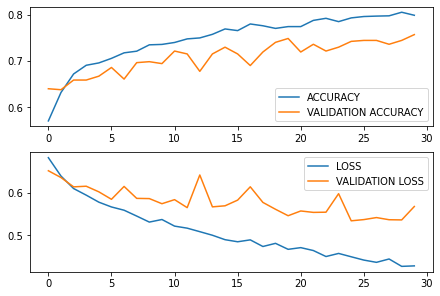

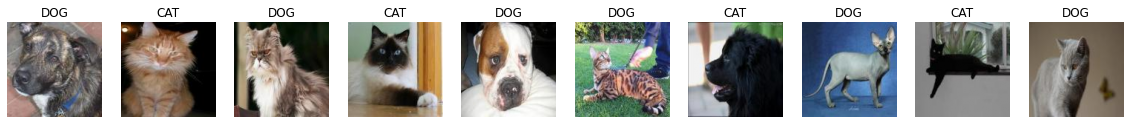

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

theModel,trainHistory=load_trained_model('SECONDMODEL')
plot_history(trainHistory)

theEvaluation=theModel.evaluate(testGenerator)
print(theModel.metrics_names[1],"=",theEvaluation[1])

testImages,testGT=testGenerator.__getitem__(0)
thePredictions=theModel.predict(testImages)
plot_batch(testImages,np.round(thePredictions).flatten().astype('int'))

**4-c) Analitzeu els resultats en 4-b i compareu-los amb els de l'exercici 3. Hi ha overfitting ara? Per què? Creieu que el model podria entrenar-se durant més epochs?**

Els resultats també mostren sobreentrenament, encara que menys evident que a l'exercici anterior. Per tant, l'augmentació de dades ha millorat lleugerament el comportament de la xarxa. Tot i això, és poc probable que augmentant el nombre d'epochs milloressin els resultats finals.

#### **Exercici 5: Transfer learning**

Arribats a aquest punt hauríeu d'haver detectat dues de les debilitats de les xarxes neuronals: la necessitat de grans quantitats de dades per a l'entrenament (milers d'imatges no han estat suficients fins i tot amb augmentació de dades) i els llargs temps d'entrenament. Per tant, lúnic que ens pot ajudar a entrenar adequadament una xarxa neuronal és un conjunt de dades extremadament gran i un ordinador extremadament potent.

Bé... en realitat no necessàriament. Si algú ha entrenat prèviament una xarxa neuronal amb quantitats ingents d'imatges similars a les nostres durant molt de temps i ha fet públic el model entrenat, podrem utilitzar-lo i adaptar-lo al nostre problema concret. Aquest procés es coneix com a *transfer learning*.

En aquest exercici explorarem el transfer learning mitjançant l'arquitectura Xception prèviament entrenada amb el dataset Imagenet.

**5-a) Busqueu informació i descriviu breument l'arquitectura Xception i el dataset Imagenet.**

**Mostreu la vostra resposta a continuació en aquesta mateixa cel·la.**

S'espera que l'estudiant resumeixi breument l'estructura de capes de Xception i també el tipus d'imatges i les classes presents a Imagenet.

**5-b) Creeu una instància de l'arquitectura Xception especificant que la dimensió d'entrada (input\_shape) és (128,128,3), que la volem preentrenada amb Imagenet i que no volem instanciar el classificador (tan sols l'extractor de característiques). Després, feu que aquesta instància sigui *NO* entrenable.**

**Noteu que:**
* **La instància *NO* ha de ser entrenable atès que utilitzarem l'extractor de característiques tal com és i només entrenarem el nostre classificador.**
* **Per a instanciar Xception, busqueu Xception a la documentació del paquet keras.applications.**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

from tensorflow.keras.applications import Xception
convBase=Xception(weights='imagenet',include_top=False,input_shape=(128,128,3))
convBase.trainable = False

**5-c) Completeu la funció create\_and\_compile\_Xception\_model proporcionada a la cel·la següent de manera que la instància de Xception creada en l'activitat anterior s'utilitzi com a extractor de característiques. El classificador ha de tenir la mateixa estructura que a les activitats anteriors. La funció de pèrdua, les mètriques i l'optimitzador també han de ser les mateixes que en apartats anteriors. Després de fer-ho, executeu la cel·la, examineu el resum (summary()) del model i responeu a les següents preguntes.**

* **Quants paràmetres entrenables i no entrenables té el model?**
* **Per què aquest model té tants paràmetres no entrenables?**
* **Quin propòsit té tenir tants paràmetres no entrenables?**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

def create_and_compile_Xception_model():
    theModel=models.Sequential([

# ---> PUT YOUR CODE TO COMPLETE THE MODEL BETWEEN THIS LINE...
        convBase,
        Flatten(),
        Dense(128,activation='relu'),
# ... AND THIS LINE <---

        Dense(1,activation='sigmoid')
    ])

# ---> PUT YOUR CODE TO COMPLETE THE MODEL BETWEEN THIS LINE...
    theModel.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['accuracy'])
# ... AND THIS LINE <---
    return theModel

theModel=create_and_compile_Xception_model()
theModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Model)             (None, 4, 4, 2048)        20861480  
_________________________________________________________________
flatten_2 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 129       
Total params: 25,056,041
Trainable params: 4,194,561
Non-trainable params: 20,861,480
_________________________________________________________________


**Responeu a continuació en aquesta mateixa cel·la les preguntes formulades**

* El model té 25056041 paràmetres en total, dels quals 4194561 són entrenables i 20861480 són no entrenables.
* Els paràmetres no entrenables formen part del model Xception. Són no entrenables atès que hem definit la instància de Xception com a no entrenable.
* Encara que Xception podria afinar-se amb les nostres dades fent els seus paràmetres entrenables, cal esperar que (atès els continguts d'Imagenet) respongui adequadament a imatges de gossos i gats. Per tant, essent els paràmetres no entrenables aconseguim reduir substancialment el temps d'entrenament.

**5-d) Entreneu el model anterior durant 30 epochs utilitzant trainGenerator2 com a proveïdor de dades d'entrenament i valGenerator per proporcionar dades de validació. Guardeu l'històric de l'entrenament i deseu-lo en disc juntament amb el model entrenat mitjançant save\_trained\_model utilitzant XCEPTIONMODEL com a fileName.**

**El temps d'entrenament en aquest cas pot ser superior al dels models previs, encara que no gaire. Podeu esperar un increment proper al 50% en temps.**

In [ ]:
# WRITE YOUR CODE IN THIS CELL AND EXECUTE IT.

import os
theModel=create_and_compile_Xception_model()
if not os.path.isfile('XCEPTIONMODEL.h5'):
    trainHistory=theModel.fit(trainGenerator2,validation_data=valGenerator,epochs=30).history
    save_trained_model('XCEPTIONMODEL',theModel,trainHistory)
else:
    theModel,trainHistory=load_trained_model('XCEPTIONMODEL')
    print('[WARNING] THE MODEL WAS ALREADY TRAINED AND SAVED.')

Epoch 1/30
335/335 [==============================] - 14s 42ms/step - loss: 0.3338 - accuracy: 0.8658 - val_loss: 0.1595 - val_accuracy: 0.9414
Epoch 2/30
335/335 [==============================] - 12s 37ms/step - loss: 0.2704 - accuracy: 0.8918 - val_loss: 0.2046 - val_accuracy: 0.9414
Epoch 3/30
335/335 [==============================] - 12s 37ms/step - loss: 0.2564 - accuracy: 0.9026 - val_loss: 0.1656 - val_accuracy: 0.9561
Epoch 4/30
335/335 [==============================] - 12s 37ms/step - loss: 0.2261 - accuracy: 0.9041 - val_loss: 0.3758 - val_accuracy: 0.9079
Epoch 5/30
335/335 [==============================] - 12s 37ms/step - loss: 0.2138 - accuracy: 0.9190 - val_loss: 0.2496 - val_accuracy: 0.9498
Epoch 6/30
335/335 [==============================] - 12s 37ms/step - loss: 0.2138 - accuracy: 0.9163 - val_loss: 0.2493 - val_accuracy: 0.9331
Epoch 7/30
335/335 [==============================] - 12s 37ms/step - loss: 0.2192 - accuracy: 0.9199 - val_loss: 0.1733 - val_accuracy:

**5-e) Utilitzant les funcions creades en exercicis anteriors, es demana:**

* **Dibuixeu els històrics d'entrenament.**
* **Avalueu el model amb testGenerator i imprimiu la precisió resultant (accuracy)**
* **Predigueu un lot del testGenerator i dibuixeu les imatges que conté juntament amb la classe predita (CAT o DOG).**

96/96 [==============================] - 3s 30ms/step - loss: 0.3202 - accuracy: 0.9362
accuracy = 0.9361924529075623


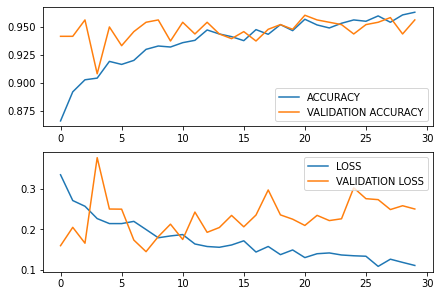

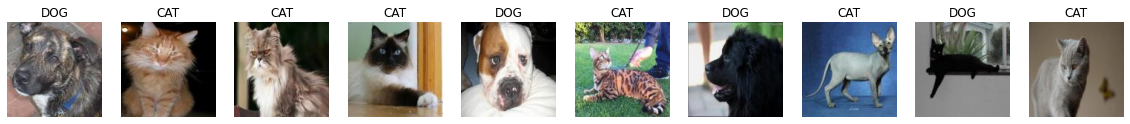

In [ ]:
theModel,trainHistory=load_trained_model('XCEPTIONMODEL')
plot_history(trainHistory)

theEvaluation=theModel.evaluate(testGenerator)
print(theModel.metrics_names[1],"=",theEvaluation[1])

testImages,testGT=testGenerator.__getitem__(0)
thePredictions=theModel.predict(testImages)
plot_batch(testImages,np.round(thePredictions).flatten().astype('int'))

**5-f) Analitzeu els resultats obtinguts. Hi ha overfitting? Són els resultats millors que en exercicis anteriors? Per què?**

**Escriviu la vostra resposta a continuació en aquesta mateixa cel·la**

S'espera que els estudiants apliquin el mateix tipus d'anàlisi que en exercicis anteriors. En aquest cas sembla haver-hi sobreentrenament però tot i així s'obté un resultat final molt bo.

Per prevenir l'overfitting i millorar els resultats es podria utilitzar un conjunt d'entrenament més gran. També es podria reentrenar l'extractor de característiques utilitzant els seus pesos actuals com a inicials.

#### ***Exercici 6: Més enllà dels classificadors***

En aquest exercici no heu de programar. Heu de cercar informació i reflexionar (partint del que heu après en els exercicis anteriors) sobre les preguntes que es formulen.

**6-a) Què creieu que passaria si intentéssim classificar, amb algun dels models anteriors, una imatge que no contingui ni un gos ni un gat? Què faríeu per estendre el model de manera que classifiqués gats, gossos i cavalls?**

**Mostreu la vostra resposta a continuació en aquesta mateixa cel·la**

Els models anteriors classificarien qualsevol imatge com a gos o gat, encara que aquesta imatge no en mostri cap dels dos. Per classificar cavalls hauríem de redefinir l'arquitectura del classificador per treballar amb 3 classes (gats, gossos i cavalls) i per això seria recomanable utilitzar codificació categòrica i 3 neurones de sortida.

Després d'això, hauríem de reentrenar el sistema des de zero amb un nou dataset que contingués les 3 classes. També es podria plantejar reentrenar el sistema partint dels pesos actuals de l'extractor de característiques. És a dir, podríem també aplicar transfer leraning.

**6-b) Les xarxes neuronals es poden utilitzar per identificar cares humanes. És a dir, per decidir qui és la persona la cara de la qual es mostra en una imatge. Això és també un problema de classificació i s'utilitza en sistema de seguretat o, recentment, per permetre l'accés a smartphones.**

**Creieu que aquests sistemes funcionen de forma semblant als que heu implementat en aquesta pràctica? Busqueu informació sobre xarxes neuronals per a reconeixement facial i reflexioneu sobre si són similars o no a les d'aquesta pràctica.**

**Mostreu la vostra resposta a continuació en aquesta mateixa cel·la.**

Teòricament, un sistema de reconeixement facial podria funcionar com els models d'aquesta pràctica, però seria extremadament poc pràctic. La diferència entre aquesta pràctica i el reconeixement facial és que en el segon cas no volem reentrenar el sistema cada vegada que s'hi inclogui una nova classe (una nova cara). Imagineu per un moment el que significaria re-entrenar una xarxa neuronal i distribuir els seus pesos a tots els *smartphones* cada vegada que un usuari es donés d'alta al sistema.

Per aquest motiu, els sistemes de reconeixement facial funcionen de manera diferent. En lloc d'aprendre a classificar cares, el que aprenen és comparar-les. Per tant, cada vegada que s'inclou una nova cara al sistema tan sols necessitem una (o unes poques) fotografies de referència i la xarxa neuronal compararà la imatge a identificar amb les de referència.

### Nota: Propietat intel·lectual

Sovint és inevitable, en produir una obra multimèdia, fer ús de recursos creats per terceres persones. És per tant comprensible fer-ho en el marc d'una pràctica dels estudis del Màster en Informàtica, sempre i quan això es documenti clarament i no suposi plagi en la pràctica.

Per tant, en presentar una pràctica que faci ús de recursos aliens, s'ha de presentar juntament amb ella un document en què es detallin tots ells, especificant el nom de cada recurs, el seu autor, el lloc on es va obtenir i el seu estatus legal: si l'obra està protegida pel copyright o s'acull a alguna altra llicència d'ús (Creative Commons, llicència GNU, GPL...). L'estudiant haurà d'assegurar-se que la llicència que sigui no impedeix específicament el seu ús en el marc de la pràctica. En cas de no trobar la informació corresponent haurà d'assumir que l'obra està protegida pel copyright.

Hauran, a més, adjuntar els fitxers originals quan les obres utilitzades siguin digitals, i el seu codi font si correspon.
